## Installation (work on colab)

In [1]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf
!pip install gym

!pip install free-mujoco-py
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install imageio==2.4.1
!pip install -U colabgymrender
!pip install mujoco

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
software-properties-common is already the newest version (0.99.22.8).
The following additional packages will be installed:
  libegl-dev libgl-dev libgles-dev libgles1 libglu1-mesa libglu1-mesa-dev libglvnd-core-dev
  libglvnd-dev libglx-dev libopengl-dev libosmesa6
The following NEW packages will be installed:
  libegl-dev libgl-dev libgl1-mesa-dev libgl1-mesa-glx libgles-dev libgles1 libglew-dev
  libglu1-mesa libglu1-mesa-dev libglvnd-core-dev libglvnd-dev libglx-dev libopengl-dev libosmesa6
  libosmesa6-dev
0 upgraded, 15 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,952 kB of archives.
After this operation, 18.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libglx-dev amd64 1.4.0-1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgl-dev amd64 1.4.0-1 [101 kB]
Get:3 http://archive.ubuntu.com/ubuntu 

In [2]:
!pip install pfrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pfrl: filename=pfrl-0.4.0-py3-none-any.whl size=155461 sha256=25733577e158c56225409d244b2ccaddcde17236c7a927f78258183364d1cb20
  Stored in directory: /root/.cache/pip/wheels/22/4a/0f/a87cd1ae925086eb3a1b8759f620fcf48e47939fb082946c3b
Successfully built pfrl


In [3]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.6 MB/s eta 0:00:00


In [4]:
from typing import Optional, List
from copy import deepcopy

import functools
import numpy as np
from sklearn.utils import check_random_state

import gymnasium as gym
import gym.wrappers
from gym.spaces import Discrete, Box

import pfrl

In [5]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [34]:
%cd /content/drive/MyDrive/class-learning-for-robot-decision-making/_final_project/codes

/content/drive/.shortcut-targets-by-id/1u1b_5X-UjRqHkfYLcfMEoNxHfy2ozg7f/class-learning-for-robot-decision-making/_final_project/codes


# Original env

In [7]:
env_name = "Hopper-v3"
num_envs = 5
seed = 42

monitor = False
render = False

process_seeds = np.arange(num_envs) + seed * num_envs

In [8]:
def make_env(process_idx, test):
    env = gym.make(env_name)  #
    # Unwrap TimiLimit wrapper
    assert isinstance(env, gym.wrappers.TimeLimit)
    env = env.env
    # Use different random seeds for train and test envs
    process_seed = int(process_seeds[process_idx])
    env_seed = 2**32 - 1 - process_seed if test else process_seed
    env.seed(env_seed)
    # Cast observations to float32 because our model uses float32
    env = pfrl.wrappers.CastObservationToFloat32(env)
    # Normalize action space to [-1, 1]^n
    env = pfrl.wrappers.NormalizeActionSpace(env)
    if monitor:
        env = gym.wrappers.Monitor(env, "monitor")
    if render:
        env = pfrl.wrappers.Render(env)
    return env

In [9]:
env = make_env(0, test=False)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment Hopper-v3 is out of date. You should consider upgrading to version `v4`.
  logger.warn(


Compiling /usr/local/lib/python3.10/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.10/dist-packages/mujoco_py/cymj.pyx


INFO:root:running build_ext
INFO:root:building 'mujoco_py.cymj' extension
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310/usr
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310/usr/local
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310/usr/local/lib
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-31

In [10]:
env.observation_space

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Box(-inf, inf, (11,), float64)

In [11]:
env.action_space

Box(-1.0, 1.0, (3,), float32)

In [12]:
obs_size = env.observation_space.shape[0]
action_size = env.action_space.shape[0]
timestep_limit = env.spec.max_episode_steps

# Loading base envs and base policies

In [13]:
base_policies = None

In [15]:
# TODO
base_envs = []
xml_files = ["hopper.xml", "envs/cobblestone_hopper_loose_v1.xml", "envs/sandpaper_hopper.xml"]
for i, xml in enumerate(xml_files):
    env_ = gym.make(env_name, exclude_current_positions_from_observation=False, xml_file=xml)
    base_envs.append(env_)

# Meta hopper env with terrain

In [16]:
class HopperEnvWithTerrain(gym.Env):

    def __init__(
        self,
        base_envs: List[gym.Env] = base_envs,
        base_policies: Optional[List[pfrl.agent.Agent]] = base_policies,
        average_distance_of_each_terrain: float = 1.0,
        dim_terrain_feature: int = 5,
        random_state: Optional[int] = None,
    ):
        if random_state is not None:
            self.random_ = check_random_state(random_state)
        else:
            self.random_ = check_random_state(12345)

        self.base_envs = base_envs
        self.base_policies = base_policies
        self.use_base_policy = (base_policies is not None)

        self.n_envs = len(base_envs)

        if base_policies is not None:
            self.n_policies = len(base_policies)
        else:
            self.n_policies = None

        self.base_terrain_feats = self.random_.uniform(
            size=(self.n_envs, dim_terrain_feature),
        )

        self.observation_space = Box(
            low=np.concatenate(
                (np.zeros((dim_terrain_feature)),
                 self.base_envs[0].observation_space.low)),
            high=np.concatenate(
                (np.ones((dim_terrain_feature)),
                 self.base_envs[0].observation_space.high)),
        )
        self.base_envs[0].observation_space
        self.dim_observation = self.observation_space.shape[0] - 1

        if self.use_base_policy:
            self.action_space = Discrete(3)
        else:
            self.action_space = self.base_envs[0].action_space

        self.average_distance_of_each_terrain = average_distance_of_each_terrain

    def _get_env_id_given_position(self):
        env_id = np.argmax(self.env_change_position > self.position)
        env_id = self.env_ids_position[env_id]
        return env_id

    def _update_state_of_all_envs(
        self,
        target_env_id: int,
    ):
        current_env = self.base_envs[target_env_id]
        qpos = current_env.sim.data.qpos
        qvel = current_env.sim.data.qvel
        for i in range(self.n_envs):
            self.base_envs[i].set_state(qpos, qvel)

    def reset(self):
        self.env_change_position = self.random_.normal(
            loc=self.average_distance_of_each_terrain,
            scale=self.average_distance_of_each_terrain * 0.1,
            size=(10000, )
        ).cumsum()
        self.env_ids_position = self.random_.choice(
            self.n_envs,
            size=10000,
            replace=True,
        )

        for i in range(len(base_envs)):
            self.base_envs[i].reset()

        env_id = self.env_ids_position[0]
        initial_state = self.base_envs[env_id].reset()

        self._update_state_of_all_envs(env_id)
        self.position = initial_state[0]

        self.state = initial_state[1:]

        noisy_terrain_feats = self.random_.normal(
            loc=self.base_terrain_feats[env_id],
            scale=0.05,
        )
        initial_state = np.concatenate((noisy_terrain_feats, initial_state))

        return initial_state

    def step(self, action: np.array):
        env_id = self._get_env_id_given_position()

        if self.use_base_policy:
            if action == -1:
                action = self.base_policies[env_id].act(self.state)
            else:
                action = self.base_policies[action].act(self.state)

        state, reward, done, info = self.base_envs[env_id].step(action)
        self._update_state_of_all_envs(env_id)

        self.position = state[0]
        self.state = state[1:]

        noisy_terrain_feats = self.random_.normal(
            loc=self.base_terrain_feats[env_id],
            scale=0.05,
        )
        state = np.concatenate((noisy_terrain_feats, state))

        return state, reward, done, info

    def render(self):
        env_id = self._get_env_id_given_position()
        return self.base_envs[env_id].render()


In [17]:
gym.register(
    id="Hopper-with-terrain-v3",
    entry_point=HopperEnvWithTerrain,
    max_episode_steps=timestep_limit,
)

In [18]:
obs_size = env.observation_space.shape[0]
action_size = env.action_space.shape[0]
timestep_limit = env.spec.max_episode_steps

## Initialize environment

In [19]:
env_name = "Hopper-with-terrain-v3"

In [20]:
env = make_env(0, test=False)

In [21]:
def make_batch_env(test):
    return pfrl.envs.MultiprocessVectorEnv(
        [
            functools.partial(make_env, idx, test)
            for idx, env in enumerate(range(num_envs))
        ]
    )

In [22]:
obs_size = env.observation_space.shape[0]
action_size = env.action_space.shape[0]
timestep_limit = env.spec.max_episode_steps

## SAC Config (with PFRL)

sample codes and parameters in [this file](https://github.com/pfnet/pfrl/blob/master/examples/mujoco/reproduction/soft_actor_critic/train_soft_actor_critic.py).

In [23]:
import torch
from torch import distributions, nn

from pfrl import experiments, replay_buffers, utils
from pfrl.nn.lmbda import Lambda

In [24]:
# default params
policy_output_scale = 1.0

policy_hidden_dim = 256
policy_lr = 3e-4

q_func_hidden_dim = 256
q_func_lr = 3e-4

temperature_optimizer_lr = 3e-4

buffer_size = 10 ** 6
replay_start_size = 10 ** 4
batch_size = 256
gamma = 0.99

# steps = 10 ** 6
steps = 5 * 10 ** 5

In [25]:
class QFunction(torch.nn.Module):

    def __init__(self, obs_size, n_actions):
        super().__init__()
        self.l1 = torch.nn.Linear(obs_size, 50)
        self.l2 = torch.nn.Linear(50, 50)
        self.l3 = torch.nn.Linear(50, n_actions)

    def forward(self, x):
        h = x
        h = torch.nn.functional.relu(self.l1(h))
        h = torch.nn.functional.relu(self.l2(h))
        h = self.l3(h)
        return pfrl.action_value.DiscreteActionValue(h)

In [26]:
def burnin_action_func():
    """Select random actions until model is updated one or more times."""
    return np.random.uniform(env.action_space.low, env.action_space.high).astype(np.float32)

In [27]:
def squashed_diagonal_gaussian_head(x):
    assert x.shape[-1] == action_size * 2
    mean, log_scale = torch.chunk(x, 2, dim=1)
    log_scale = torch.clamp(log_scale, -20.0, 2.0)
    var = torch.exp(log_scale * 2)
    base_distribution = distributions.Independent(
        distributions.Normal(loc=mean, scale=torch.sqrt(var)), 1
    )
    # cache_size=1 is required for numerical stability
    return distributions.transformed_distribution.TransformedDistribution(
        base_distribution, [distributions.transforms.TanhTransform(cache_size=1)]
    )

In [28]:
def make_policy_with_optimizer():
    policy = nn.Sequential(
        nn.Linear(obs_size, policy_hidden_dim),
        nn.ReLU(),
        nn.Linear(policy_hidden_dim, policy_hidden_dim),
        nn.ReLU(),
        nn.Linear(policy_hidden_dim, action_size * 2),
        Lambda(squashed_diagonal_gaussian_head),
    )
    torch.nn.init.xavier_uniform_(policy[0].weight)
    torch.nn.init.xavier_uniform_(policy[2].weight)
    torch.nn.init.xavier_uniform_(policy[4].weight, gain=policy_output_scale)
    policy_optimizer = torch.optim.Adam(policy.parameters(), lr=policy_lr)
    return policy, policy_optimizer

In [29]:
def make_q_func_with_optimizer():
    q_func = nn.Sequential(
        pfrl.nn.ConcatObsAndAction(),
        nn.Linear(obs_size + action_size, q_func_hidden_dim),
        nn.ReLU(),
        nn.Linear(q_func_hidden_dim, q_func_hidden_dim),
        nn.ReLU(),
        nn.Linear(q_func_hidden_dim, 1),
    )
    torch.nn.init.xavier_uniform_(q_func[1].weight)
    torch.nn.init.xavier_uniform_(q_func[3].weight)
    torch.nn.init.xavier_uniform_(q_func[5].weight)
    q_func_optimizer = torch.optim.Adam(q_func.parameters(), lr=q_func_lr)
    return q_func, q_func_optimizer

In [30]:
policy, policy_optimizer = make_policy_with_optimizer()
q_func1, q_func1_optimizer = make_q_func_with_optimizer()
q_func2, q_func2_optimizer = make_q_func_with_optimizer()

In [31]:
rbuffer = replay_buffers.ReplayBuffer(buffer_size)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Train SAC policy online

In [32]:
agent = pfrl.agents.SoftActorCritic(
    policy,
    q_func1,
    q_func2,
    policy_optimizer,
    q_func1_optimizer,
    q_func2_optimizer,
    rbuffer,
    gamma=gamma,
    replay_start_size=replay_start_size,
    gpu=0 if torch.cuda.is_available() else -1,
    minibatch_size=batch_size,
    burnin_action_func=burnin_action_func,
    entropy_target=-action_size,
    temperature_optimizer_lr=temperature_optimizer_lr,
)

In [ ]:
experiments.train_agent_batch_with_evaluation(
    agent=agent,
    env=make_batch_env(test=False),
    eval_env=make_batch_env(test=False),
    outdir="logs/mixed",
    steps=steps,
    eval_n_steps=None,
    eval_n_episodes=30,
    eval_interval=5 * 10 ** 3,
    log_interval=10 ** 3,
    max_episode_len=timestep_limit,
)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be pas

(<pfrl.agents.soft_actor_critic.SoftActorCritic at 0x7d4ef8c0ebc0>,
 [{'average_q1': nan,
   'average_q2': nan,
   'average_q_func1_loss': nan,
   'average_q_func2_loss': nan,
   'n_updates': 0,
   'average_entropy': nan,
   'temperature': 1.0,
   'eval_score': 11.623751329837196},
  {'average_q1': -0.17558007,
   'average_q2': -0.23542228,
   'average_q_func1_loss': 3.1768946647644043,
   'average_q_func2_loss': 3.3060193061828613,
   'n_updates': 1,
   'average_entropy': 1.5813969,
   'temperature': 0.9997000694274902,
   'eval_score': 12.293270344066988},
  {'average_q1': 46.819084,
   'average_q2': 46.875404,
   'average_q_func1_loss': 3.7903609001636505,
   'average_q_func2_loss': 3.8519053626060487,
   'n_updates': 5001,
   'average_entropy': -0.41934192,
   'temperature': 0.32523313164711,
   'eval_score': 167.74740440768662},
  {'average_q1': 80.97967,
   'average_q2': 81.0113,
   'average_q_func1_loss': 7.401262819766998,
   'average_q_func2_loss': 7.123835413455963,
   'n_upd

In [ ]:
# agent.save("sac-baseline")

## online evaluation

In [35]:
agent.load("sac-baseline")

In [36]:
eval_stats = experiments.eval_performance(
    env=make_batch_env(test=True),
    agent=agent,
    n_steps=None,
    n_episodes=30,
    max_episode_len=timestep_limit,
)
print(
    "n_runs: {} mean: {} median: {} stdev {}".format(
        10,
        eval_stats["mean"],
        eval_stats["median"],
        eval_stats["stdev"],
    )
)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recomme

n_runs: 10 mean: 489.3615611715486 median: 452.56059971066963 stdev 81.01465868705594


In [38]:
logs_baseline = {
    "mean": eval_stats["mean"],
    "std": eval_stats["stdev"],
}

In [39]:
import pickle
with open("baseline_performances.pkl", "wb") as f:
    pickle.dump(logs_baseline, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## render (TODO)

In [ ]:
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
def make_env_for_render():
    env = gym.make(env_name, render_mode='rgb_array')
    env = gym.wrappers.RecordEpisodeStatistics(env)
    env.seed(seed)
    env.action_space.seed(seed)
    env.observation_space.seed(seed)
    return env

In [ ]:
env_ = make_env_for_render()

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:601: UserWarning: WARN: Using the latest versioned environment `Hopper-v4` instead of the unversioned environment `Hopper`.
  logger.warn(


ValueError: ignored

RuntimeError: ignored

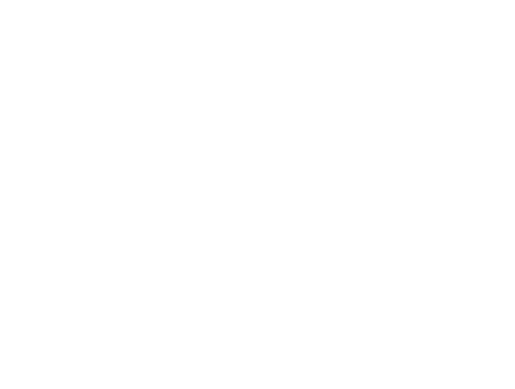

In [ ]:
plt.axis('off')
done = False
obs = env_.reset()

i = 0
while not done:
    i += 1
    if i % 20 == 0:
        ipythondisplay.clear_output(wait=True)
        # print("At timestep = ", i)
        screen = env_.render()
        plt.imshow(screen[0])
        ipythondisplay.display(plt.gcf())

    action = agent.act(obs)
    obs, reward, done, info = env_.step(action)

    if done:
        break